**Evanto Package Design**

This dataset is from Kaggle. This dataset provides insights into digital packaging label designs sold on Envato Market.

It contains over 500 rows of structured data on graphic design templates for packaging including product URLs, titles, average ratings, number of sales, prices, date published, date updated, and more.

It can be a valuable asset for training machine learning models to generate new packaging visuals, make label recommendations, or classify attributes.

Beyond just label details, the dataset provides a window into the digital marketplace for graphic design assets and its interplay with packaging needs in the physical world.

**Objectives of the project** 

This notebook analyzes trends in package design on GraphicRiver.com. The goal is to identify popular niches and attributes of best-selling package templates.

The analysis will:

-Determine which package design styles and themes have the highest sales

-Explore factors driving demand such as color schemes, fonts, and graphic elements

-Identify key insights and patterns among top-performing designs

-Outline opportunities to create new package templates that align with current market trends

The notebook will synthesize data to provide data-backed recommendations for creating commercially successful package designs within GraphicRiver's guidelines and respecting designers' intellectual property rights.

**Importing required libraries for the project**

note: some libraries will be imported within the cells as analysis continues as and when they're required

In [1]:
#IMPORTING REQUIRED LIBRARIES

import numpy as np #linear algebra
import pandas as pd # data processing, converting csv into data frame
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Importing the dataset - CSV file and loading it into a dataframe**

In [2]:
#importing the dataset 
path = r"C:\Users\marumom\Desktop\DATA ANALYSIS Projects 2023\evanto_package_processed.csv"

#use pandas method read_csv to load data into dataframe
data = pd.read_csv(path, encoding='UTF-8')

In [3]:
#used method head to display first 5 rows of the df
data.head()


Image source  \
0  https://graphicriver.img.customer.envatouserco...   
1  https://graphicriver.img.customer.envatouserco...   
2  https://graphicriver.img.customer.envatouserco...   
3  https://graphicriver.img.customer.envatouserco...   
4  https://graphicriver.img.customer.envatouserco...   

                                       Title        Creator Price($)  N°Sale  \
0                 Box Set For Business Cards         zarins        9   222.0   
1  Label Design  Bottle Nutrition Supplement  designstudios        9   216.0   
2                        Juice Bottle Label        Artsignz        8   203.0   
3                                     Labels       mihalymm       13   188.0   
4                                     Labels       mihalymm       13   181.0   

   Rate  N°Reviews        Date  \
0  4.50         10  2012-06-08   
1  0.00          0  2016-02-16   
2  4.20          5  2016-02-03   
3  2.33          3  2013-11-13   
4  3.80          5  2013-09-03   

                                                 Url  
0  https://graphicriver.net/item/box-set-for-busi...  
1  https://graphicriver.net/item/label-design-tem...  
2  https://graphicriver.net/item/juice-bottle-lab...  
3       https://graphicriver.net/item/labels/6114815  
4       https://graphicriver.net/item/labels/5398701

In [4]:
#information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image source  622 non-null    object 
 1   Title         594 non-null    object 
 2   Creator       594 non-null    object 
 3   Price($)      594 non-null    object 
 4   N°Sale        594 non-null    float64
 5   Rate          622 non-null    float64
 6   N°Reviews     622 non-null    int64  
 7   Date          622 non-null    object 
 8   Url           622 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 43.9+ KB


**Exploratory Data Analysis** 

In [5]:
#identify missing data along each row *

data= data[data.notnull().all(axis=1)]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 621
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image source  594 non-null    object 
 1   Title         594 non-null    object 
 2   Creator       594 non-null    object 
 3   Price($)      594 non-null    object 
 4   N°Sale        594 non-null    float64
 5   Rate          594 non-null    float64
 6   N°Reviews     594 non-null    int64  
 7   Date          594 non-null    object 
 8   Url           594 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 46.4+ KB


In [6]:
#statistical summary of df for the numerical data 

data.describe()


N°Sale        Rate   N°Reviews
count  594.000000  594.000000  594.000000
mean    18.101010    0.124613    0.148148
std     28.442123    0.693481    0.850516
min      1.000000    0.000000    0.000000
25%      3.250000    0.000000    0.000000
50%      8.000000    0.000000    0.000000
75%     20.000000    0.000000    0.000000
max    222.000000    5.000000   10.000000

In [7]:
# rename some of the column names for convenience 

data = data.rename(columns = {'Price($)': 'Price', 'N°Sale':'Sales', 'N°Reviews':'Reviews'})
data.head()



Image source  \
0  https://graphicriver.img.customer.envatouserco...   
1  https://graphicriver.img.customer.envatouserco...   
2  https://graphicriver.img.customer.envatouserco...   
3  https://graphicriver.img.customer.envatouserco...   
4  https://graphicriver.img.customer.envatouserco...   

                                       Title        Creator Price  Sales  \
0                 Box Set For Business Cards         zarins     9  222.0   
1  Label Design  Bottle Nutrition Supplement  designstudios     9  216.0   
2                        Juice Bottle Label        Artsignz     8  203.0   
3                                     Labels       mihalymm    13  188.0   
4                                     Labels       mihalymm    13  181.0   

   Rate  Reviews        Date  \
0  4.50       10  2012-06-08   
1  0.00        0  2016-02-16   
2  4.20        5  2016-02-03   
3  2.33        3  2013-11-13   
4  3.80        5  2013-09-03   

                                                 Url  
0  https://graphicriver.net/item/box-set-for-busi...  
1  https://graphicriver.net/item/label-design-tem...  
2  https://graphicriver.net/item/juice-bottle-lab...  
3       https://graphicriver.net/item/labels/6114815  
4       https://graphicriver.net/item/labels/5398701

In [8]:
#drop the values that don't "make sense" and were possibly included in the dataset incorrectly 

data = data.drop(data[data['Price'] == '18 $16'].index)

In [9]:
# before, convert to numeric data types

data[['Price']] =data[['Price']].astype('float')
data[['Sales']] =data[['Sales']].astype('int')
data[['Rate']]=data[['Rate']].astype('float')
data[['Reviews']]=data[['Reviews']].astype('int')


#convert to datetime using pd.to_datetime

data['Date'] = pd.to_datetime(data['Date'])

#extract Year using series.dt.year()
data['Year']= data['Date'].dt.strftime('%Y')

In [10]:
#create new column called Income (sales*price)

Income = data['Price'] * data['Sales']
data['Income'] = Income
data

Image source  \
0    https://graphicriver.img.customer.envatouserco...   
1    https://graphicriver.img.customer.envatouserco...   
2    https://graphicriver.img.customer.envatouserco...   
3    https://graphicriver.img.customer.envatouserco...   
4    https://graphicriver.img.customer.envatouserco...   
..                                                 ...   
617  https://graphicriver.img.customer.envatouserco...   
618  https://graphicriver.img.customer.envatouserco...   
619  https://graphicriver.img.customer.envatouserco...   
620  https://graphicriver.img.customer.envatouserco...   
621  https://graphicriver.img.customer.envatouserco...   

                                          Title        Creator  Price  Sales  \
0                    Box Set For Business Cards         zarins    9.0    222   
1     Label Design  Bottle Nutrition Supplement  designstudios    9.0    216   
2                           Juice Bottle Label        Artsignz    8.0    203   
3                                        Labels       mihalymm   13.0    188   
4                                        Labels       mihalymm   13.0    181   
..                                          ...            ...    ...    ...   
617                Food Supplement Capsule Box     Artsoldiers   21.0      1   
618                             Cosmetic Label          Dkgray   15.0      1   
619                        Shampoo Label Design      Sailor_88   13.0      1   
620  Jam Label Design (Blueberry & Strawberry).    packgallery   17.0      1   
621                       Orange Juice   Design    packgallery   17.0      1   

     Rate  Reviews       Date  \
0    4.50       10 2012-06-08   
1    0.00        0 2016-02-16   
2    4.20        5 2016-02-03   
3    2.33        3 2013-11-13   
4    3.80        5 2013-09-03   
..    ...      ...        ...   
617  0.00        0 2020-08-26   
618  0.00        0 2021-05-31   
619  0.00        0 2021-03-24   
620  0.00        0 2019-11-30   
621  0.00        0 2020-11-25   

                                                   Url  Year  Income  
0    https://graphicriver.net/item/box-set-for-busi...  2012  1998.0  
1    https://graphicriver.net/item/label-design-tem...  2016  1944.0  
2    https://graphicriver.net/item/juice-bottle-lab...  2016  1624.0  
3         https://graphicriver.net/item/labels/6114815  2013  2444.0  
4         https://graphicriver.net/item/labels/5398701  2013  2353.0  
..                                                 ...   ...     ...  
617  https://graphicriver.net/item/food-supplement-...  2020    21.0  
618  https://graphicriver.net/item/cosmetic-label-t...  2021    15.0  
619  https://graphicriver.net/item/shampoo-label-de...  2021    13.0  
620  https://graphicriver.net/item/jam-label-design...  2019    17.0  
621  https://graphicriver.net/item/template-packagi...  2020    17.0  

[592 rows x 11 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 621
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Image source  592 non-null    object        
 1   Title         592 non-null    object        
 2   Creator       592 non-null    object        
 3   Price         592 non-null    float64       
 4   Sales         592 non-null    int32         
 5   Rate          592 non-null    float64       
 6   Reviews       592 non-null    int32         
 7   Date          592 non-null    datetime64[ns]
 8   Url           592 non-null    object        
 9   Year          592 non-null    object        
 10  Income        592 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 50.9+ KB


In [12]:
#calculate the mean price, number of sales, rating using .mean functions 

average_price = data['Price'].mean()
print('The average price in the data set = ', average_price)
average_sales = data['Sales'].mean()
print('The average Sales in the data set =' , average_sales)
average_rate = data['Rate'].mean()
print('The average Rate in the data set =' , average_rate)


The average price in the data set =  26.46283783783784
The average Sales in the data set = 18.10810810810811
The average Rate in the data set = 0.12503378378378377


In [13]:
#exploration continues

#who are the creators how many labels have they created each?

data['Creator'].value_counts()


graphicgrow      118
Plexa_Designs     65
Dkgray            59
jumpingideas      46
packgallery       41
                ... 
osky               1
luuqas             1
sgcanturk          1
everytuesday       1
Sailor_88          1
Name: Creator, Length: 63, dtype: int64

In [14]:
#group by creator
data_creator = data[['Creator', 'Price', 'Sales', 'Rate', 'Reviews', 'Income']]

grouped_creator = data_creator.groupby(['Creator'], as_index=False).sum()
grouped_creator


Creator  Price  Sales   Rate  Reviews  Income
0        -axnorpix    6.0     20   0.00        0   120.0
1        Alexbus66   19.0      6   0.00        0   114.0
2     AmssCreation    9.0      1   0.00        0     9.0
3   ArtBeatDesigns  320.0     41   0.00        0  1012.0
4         Artsignz   43.0    349   4.20        5  3086.0
..             ...    ...    ...    ...      ...     ...
58       sgcanturk    9.0     45   0.00        0   405.0
59    shockydesign    8.0     23   0.00        0   184.0
60      utixgrapix   12.0      1   0.00        0    12.0
61     vinyljunkie   30.0     28   0.00        0   280.0
62          zarins   25.0    399  13.77       21  3414.0

[63 rows x 6 columns]

In [15]:
#finding which creater earned the most 

grouped_creator.sort_values('Income', ascending =False)


Creator   Price  Sales   Rate  Reviews   Income
17    Plexa_Designs  5875.0    621   0.00        0  56419.0
39      graphicgrow  3501.0    918   2.00        3  27483.0
47         mihalymm   418.0   1793  16.80       19  22705.0
43     jumpingideas  1420.0    702   9.67        6  20184.0
11           Dkgray   940.0    780   0.00        0  12854.0
..              ...     ...    ...    ...      ...      ...
18        Sailor_88    13.0      1   0.00        0     13.0
60       utixgrapix    12.0      1   0.00        0     12.0
2      AmssCreation     9.0      1   0.00        0      9.0
20  StellarGraphics     4.0      2   0.00        0      8.0
28            ddraw     6.0      1   0.00        0      6.0

[63 rows x 6 columns]

In [16]:
#creator with the highest Rate and Sales 
grouped_creator.sort_values(['Rate', 'Sales'], ascending=False)


Creator   Price  Sales   Rate  Reviews   Income
47      mihalymm   418.0   1793  16.80       19  22705.0
62        zarins    25.0    399  13.77       21   3414.0
43  jumpingideas  1420.0    702   9.67        6  20184.0
6         BaGeRa    30.0    254   7.00        8   1524.0
4       Artsignz    43.0    349   4.20        5   3086.0
..           ...     ...    ...    ...      ...      ...
21    VyamPixels    12.0      2   0.00        0     24.0
2   AmssCreation     9.0      1   0.00        0      9.0
18     Sailor_88    13.0      1   0.00        0     13.0
28         ddraw     6.0      1   0.00        0      6.0
60    utixgrapix    12.0      1   0.00        0     12.0

[63 rows x 6 columns]

In [17]:
#quantify the productivity over the years

data['Year'].value_counts()


2017    132
2020     99
2016     71
2018     71
2015     53
2019     46
2012     39
2021     35
2013     23
2022     11
2014     10
2011      1
2023      1
Name: Year, dtype: int64

**Visual Analysis of the dataset**

In this part of the project, the aim is to pick up any trends in the dataset between the variables. 
- Heat map to find the pearson correlations in the data
- Multilinear regression
-

<Axes: >

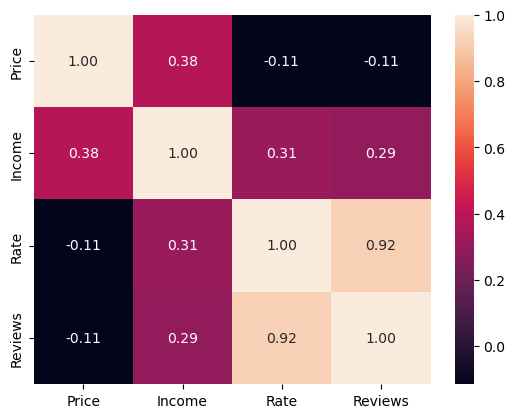

In [18]:
#build correlation matrix 

sns.heatmap(data[['Price', 'Income', 'Rate', 'Reviews']].corr(), annot = True, fmt =".2f")

#it can be seen that the pearson correlations are quite low except for the Rate and Reviews variables. 
#this already indicated that the strength of linear correlations for the other variables will be weak besides the Rate and Reviews 
#correlation which is considerably higher at 0.92


In [19]:
#plotting a scatter plot matrix (splom) 

import plotly.express as px

fig = px.scatter_matrix(data[['Price', 'Income', 'Rate', 'Reviews']])
fig.show()

C:\Users\marumom\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


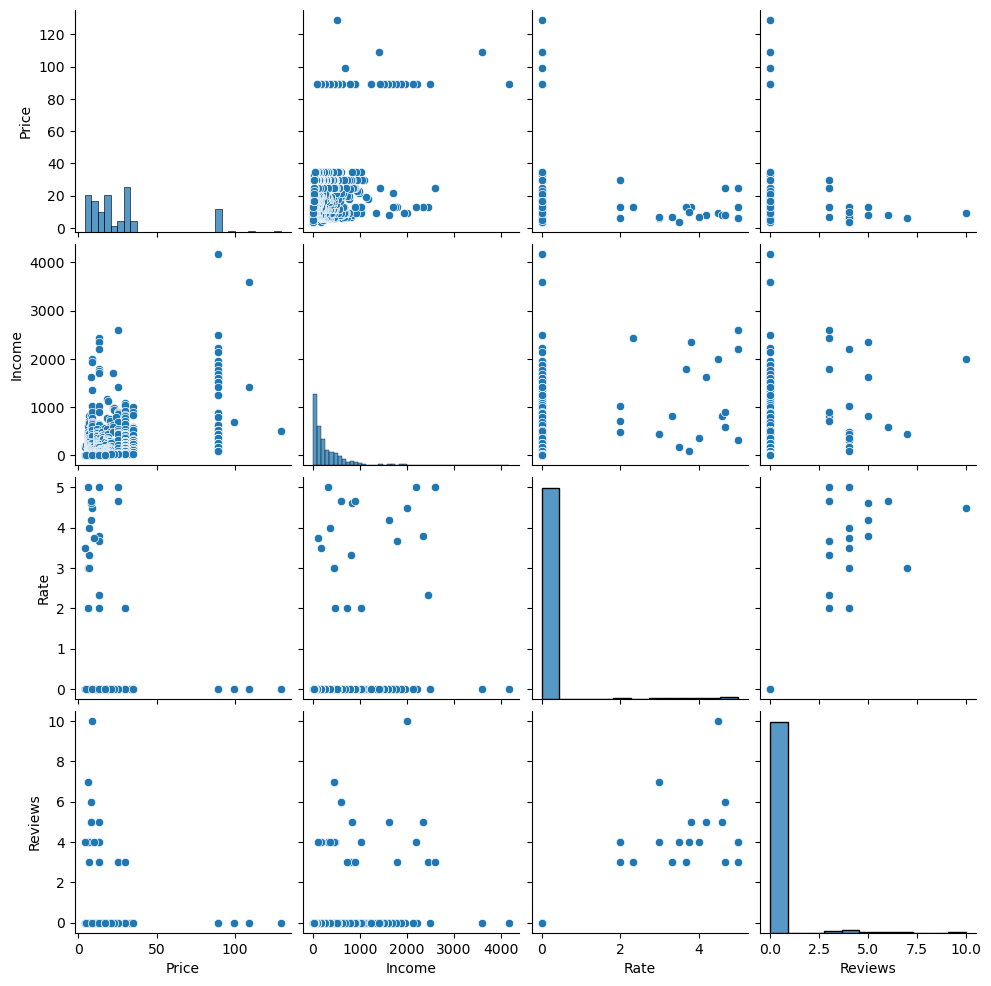

In [20]:
#a different way to create scatter plot matrix that might be a bit clearer to see and thus interpret

sns.pairplot(data[['Price', 'Income', 'Rate', 'Reviews']])

------++-------
NOTES
1. plot a scatter plot matrix (splom) -> df.pairplot() and check the pandas docs. This is really usefull for your EDA.
2. use more viz or plots in your EDA. It really helps to see what the data is doing. Plot everything!
------++--------

**So the outcome variable we are investigating = Sales or maybe Income as well
Which variables are significant predictors of the sales or Income?**

**Important question: How significant is the regression line to make predictions with highest possible accuracy?**


In [21]:
#analyzing individual feature patterns
#to start understanding the relationship between an individual variable and the price, I'll use 'regplot' 
#which plots the scatterplot plus the fitted regression line for the data 


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(1.5, 233.05)

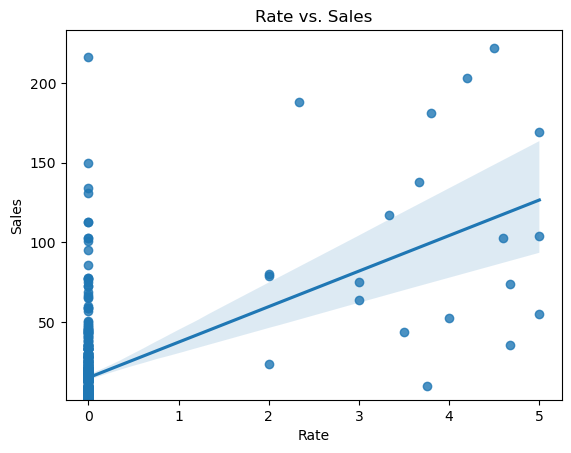

In [22]:
#sales vs. rate regression plot

sns.regplot(x='Rate', y='Sales', data=data).set(title='Rate vs. Sales')


plt.ylim(1.5,)

#it can be seen more clearer now than in the matrix plots that there are data values that seem to be outliers 
#so the dataset needs to be looked at closely for these "strange" values / outliers


In [23]:
#we need to change the 0 rating and 0 reviews to NaN as there is confusion regarding this
#the 0 rating does not mean the rating was 0, but it means the were no ratings given 
#replace all rates and reviews 0s with NaN values

data['Rate'].replace(0, np.nan, inplace=True )
data['Reviews'].replace(0, np.nan, inplace=True)
data


Image source  \
0    https://graphicriver.img.customer.envatouserco...   
1    https://graphicriver.img.customer.envatouserco...   
2    https://graphicriver.img.customer.envatouserco...   
3    https://graphicriver.img.customer.envatouserco...   
4    https://graphicriver.img.customer.envatouserco...   
..                                                 ...   
617  https://graphicriver.img.customer.envatouserco...   
618  https://graphicriver.img.customer.envatouserco...   
619  https://graphicriver.img.customer.envatouserco...   
620  https://graphicriver.img.customer.envatouserco...   
621  https://graphicriver.img.customer.envatouserco...   

                                          Title        Creator  Price  Sales  \
0                    Box Set For Business Cards         zarins    9.0    222   
1     Label Design  Bottle Nutrition Supplement  designstudios    9.0    216   
2                           Juice Bottle Label        Artsignz    8.0    203   
3                                        Labels       mihalymm   13.0    188   
4                                        Labels       mihalymm   13.0    181   
..                                          ...            ...    ...    ...   
617                Food Supplement Capsule Box     Artsoldiers   21.0      1   
618                             Cosmetic Label          Dkgray   15.0      1   
619                        Shampoo Label Design      Sailor_88   13.0      1   
620  Jam Label Design (Blueberry & Strawberry).    packgallery   17.0      1   
621                       Orange Juice   Design    packgallery   17.0      1   

     Rate  Reviews       Date  \
0    4.50     10.0 2012-06-08   
1     NaN      NaN 2016-02-16   
2    4.20      5.0 2016-02-03   
3    2.33      3.0 2013-11-13   
4    3.80      5.0 2013-09-03   
..    ...      ...        ...   
617   NaN      NaN 2020-08-26   
618   NaN      NaN 2021-05-31   
619   NaN      NaN 2021-03-24   
620   NaN      NaN 2019-11-30   
621   NaN      NaN 2020-11-25   

                                                   Url  Year  Income  
0    https://graphicriver.net/item/box-set-for-busi...  2012  1998.0  
1    https://graphicriver.net/item/label-design-tem...  2016  1944.0  
2    https://graphicriver.net/item/juice-bottle-lab...  2016  1624.0  
3         https://graphicriver.net/item/labels/6114815  2013  2444.0  
4         https://graphicriver.net/item/labels/5398701  2013  2353.0  
..                                                 ...   ...     ...  
617  https://graphicriver.net/item/food-supplement-...  2020    21.0  
618  https://graphicriver.net/item/cosmetic-label-t...  2021    15.0  
619  https://graphicriver.net/item/shampoo-label-de...  2021    13.0  
620  https://graphicriver.net/item/jam-label-design...  2019    17.0  
621  https://graphicriver.net/item/template-packagi...  2020    17.0  

[592 rows x 11 columns]

(1.5, 232.6)

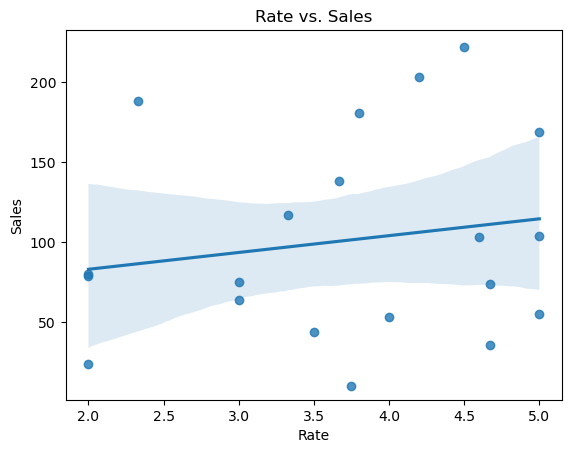

In [24]:
#sales vs. rate regression plot

sns.regplot(x='Rate', y='Sales', data=data).set(title='Rate vs. Sales')


plt.ylim(1.5,)

#achieving regression plot with less outliers
#it can be seen that there is no clear linear trend -> hence the big band on the regplot
# from this we can conclude that a non-linear model would work better

<Axes: title={'center': 'Rate vs. Sales'}, xlabel='Rate', ylabel='Sales'>

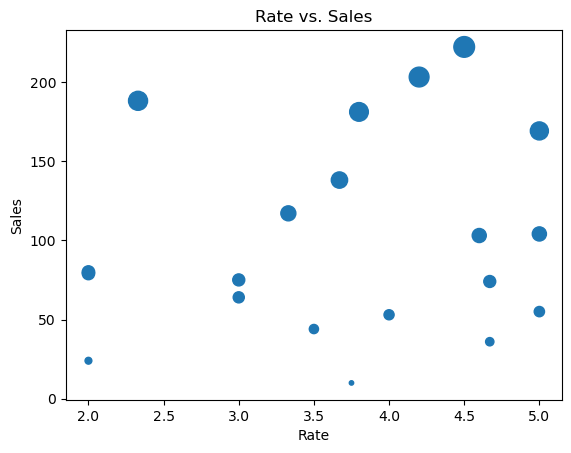

In [25]:
#or varying scatter point size based in order to see the weight of the values plotted 

data.plot(kind='scatter', x='Rate', y='Sales', s='Sales', title= 'Rate vs. Sales')


(0.0, 258.9867536628717)

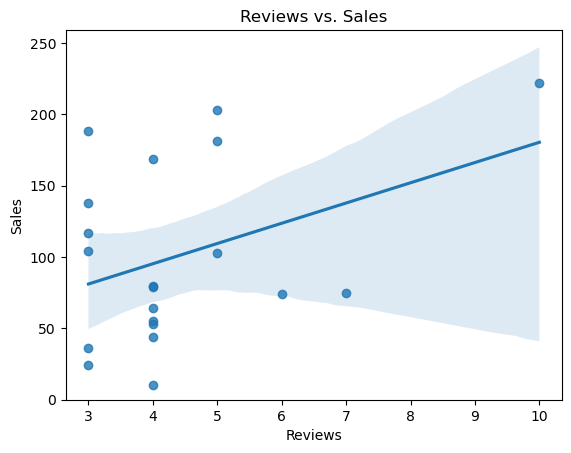

In [26]:
#sales vs. reviews

sns.regplot(x='Reviews', y='Sales', data=data).set(title='Reviews vs. Sales')
plt.ylim(0,)

#we can see a value that looks like it could be an outlier at 10
#from closely looking at the data though, it is not evident if this is an outlier, however, it possibly is not due to the
#fact that it's the number of reviews so it's an infinite number based on the reviews for each label. It would clearly be an outlier
#if the variable was rate as it is known that the ratings are from 0 to 5 so it could have been concluded it was an outlier,
#but this is not the case with reviews. It's possible that one label was reviewed 10 times.

(0.0, 233.7081853818107)

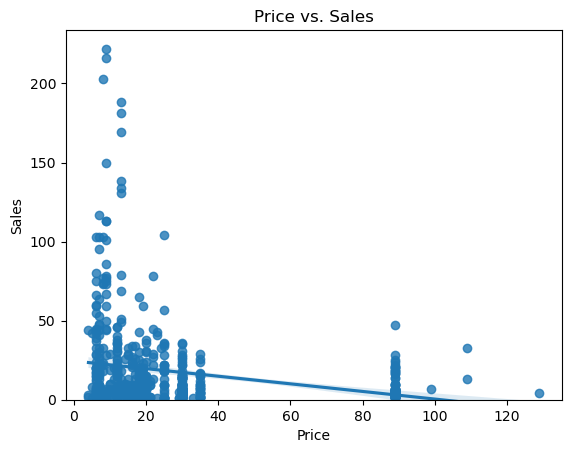

In [27]:
#Price vs. Sales

sns.regplot(x='Price', y='Sales', data=data).set(title='Price vs. Sales')
plt.ylim(0,)

#we are seeing that cheaper things sell more from the plot. much more sales below $40 compare to above.. 
#the gap between 40-80. indicates no sales for the product costing $40 to about $89, something to look at more closely
#is the gap due to the products just not being priced in that range? or there are products in that range but they're,
#not being sold

(0.0, 7.068878585646904)

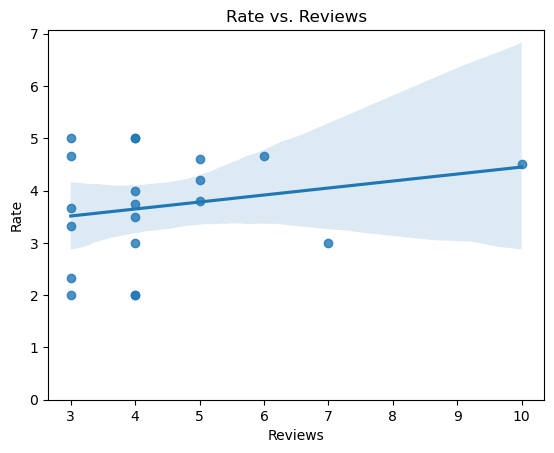

In [28]:
#rATE vs. REVIEWS

sns.regplot(x='Reviews', y='Rate', data=data).set(title='Rate vs. Reviews')
plt.ylim(0,)



(0.0, 2725.0)

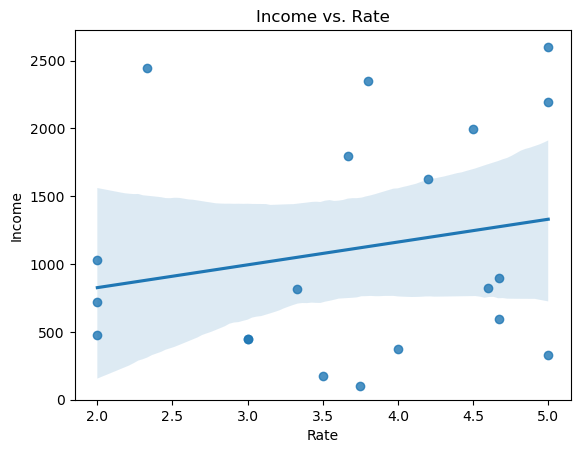

In [29]:
#Income vs. Rate

sns.regplot(x='Rate', y='Income', data=data).set(title='Income vs. Rate')
plt.ylim(0,)

#it can be seen from the plot that the majority of highly rated labels are resulting in a higher or greater income
#low rate value ---> low rated income
#however there is one low rating just below 2.5 that seems to have a high income around 2,500. 
#is that a possible outlier? 

[Text(0.5, 1.0, 'Year vs Sales')]

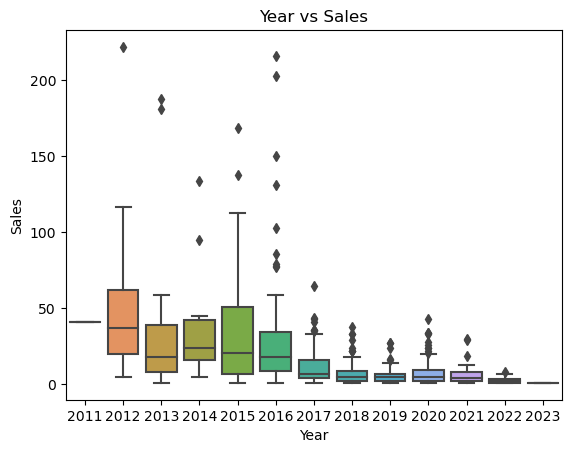

In [30]:
#Categorical variables

#data['Year'] = data['Year'].astype()

sns.boxplot(x='Year', y = 'Sales', data=data, order = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
                                                      '2019', '2020', '2021', '2022', '2023']).set(title='Year vs Sales')


In [31]:
#barplot

#we want to plot the sales against the year to see which year had the most sales

fig = px.bar(data, x ='Year', y='Sales', color='Sales')
fig

#we can see that it was 2016

In [32]:
#barplot

#we want to plot the income against the year to see which year had the most income

#!!!!!! ORDER THE YEARS ON THE X AXIS

fig = px.bar(data, x ='Year', y='Income', color='Income')
fig

#we can see that it was 2017
#the worst years were 2011, 2022, 2023, worth looking more into this 

In [33]:
#barplot
#top performing creater of labels through the years, looking at the creator with the most sold labels

fig = px.bar(data, x ='Creator', y='Sales', color='Sales')
fig

#is the top selling creator necessarily the highest revenue/income creator?

In [34]:
#barplot
#highest income creator of labels through the years, looking at the creator with the highest income

fig = px.bar(data, x ='Creator', y='Income', color='Income')
fig

#from this we learn that the top selling creator is not the highest earning
#mihalym (top seller) might be pricing very low, s/he is selling almost  4 times as much as the highest income,
#highest income is earning almost 3 times as much as mihalym so what is happening there? Worth it to take a deeper look 
#plexa_designs (highest income) is pricing quite high and not selling the most labels 
#there could be valid reasons why we are seeing this trend with these 2 creators so it could be worth it to liase with the 
#other teams responsible regarding this -is it sustaible? is the pricing done right? how is the quality of work? etc

In [35]:
#barplot
#out of curiosity plot Rating agains creator 
#explore if the highest rated creators are rated highest 
#that could contribute to the conversation from the creator vs income plot 

fig = px.bar(data, x ='Creator', y='Rate', color='Rate')
fig


**Some Statistics work**

In [36]:
#statistics finding P-values 

from scipy import stats

In [37]:
#rates vs. sales, reviews vs. sales , price vs. sales

data_corr1 = data[data.notnull().all(axis=1)]

pearson_coef, p_value = stats.pearsonr(data_corr1['Rate'], data_corr1['Sales'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P = ', p_value)

#quite low correlation for a linear model 

The Pearson Correlation Coefficient is 0.1736293021413925 with a P-value of P =  0.4641168519074672


In [38]:
#rates vs. sales, reviews vs. sales , price vs. sales

data_corr1 = data[data.notnull().all(axis=1)]

pearson_coef, p_value = stats.pearsonr(data_corr1['Reviews'], data_corr1['Sales'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.3832614708101705 with a P-value of P =  0.09530897301831749


In [39]:
#rates vs. sales, reviews vs. sales , price vs. sales

data_corr1 = data[data.notnull().all(axis=1)]

pearson_coef, p_value = stats.pearsonr(data_corr1['Reviews'], data_corr1['Rate'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.21897280828565963 with a P-value of P =  0.3536423754046172


In [40]:
#rates vs. reviews

data_corr1 = data[data.notnull().all(axis=1)]

pearson_coef, p_value = stats.pearsonr(data_corr1['Rate'], data_corr1['Income'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of P = ', p_value)

The Pearson Correlation Coefficient is 0.2092410672784955 with a P-value of P =  0.3759622544750135


**This part of the project is the regression and modeling part**

I created a copy of the original dataset to work on. Data2

In [41]:
#create a copy of the original dataset to manipulate
data1= data.copy()

In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 621
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Image source  592 non-null    object        
 1   Title         592 non-null    object        
 2   Creator       592 non-null    object        
 3   Price         592 non-null    float64       
 4   Sales         592 non-null    int32         
 5   Rate          20 non-null     float64       
 6   Reviews       20 non-null     float64       
 7   Date          592 non-null    datetime64[ns]
 8   Url           592 non-null    object        
 9   Year          592 non-null    object        
 10  Income        592 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(5)
memory usage: 53.2+ KB


In [43]:
data1.head()

Image source  \
0  https://graphicriver.img.customer.envatouserco...   
1  https://graphicriver.img.customer.envatouserco...   
2  https://graphicriver.img.customer.envatouserco...   
3  https://graphicriver.img.customer.envatouserco...   
4  https://graphicriver.img.customer.envatouserco...   

                                       Title        Creator  Price  Sales  \
0                 Box Set For Business Cards         zarins    9.0    222   
1  Label Design  Bottle Nutrition Supplement  designstudios    9.0    216   
2                        Juice Bottle Label        Artsignz    8.0    203   
3                                     Labels       mihalymm   13.0    188   
4                                     Labels       mihalymm   13.0    181   

   Rate  Reviews       Date  \
0  4.50     10.0 2012-06-08   
1   NaN      NaN 2016-02-16   
2  4.20      5.0 2016-02-03   
3  2.33      3.0 2013-11-13   
4  3.80      5.0 2013-09-03   

                                                 Url  Year  Income  
0  https://graphicriver.net/item/box-set-for-busi...  2012  1998.0  
1  https://graphicriver.net/item/label-design-tem...  2016  1944.0  
2  https://graphicriver.net/item/juice-bottle-lab...  2016  1624.0  
3       https://graphicriver.net/item/labels/6114815  2013  2444.0  
4       https://graphicriver.net/item/labels/5398701  2013  2353.0

In [44]:
#drop nans 

data2=data1.copy()

In [45]:


data2.head()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 621
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Image source  592 non-null    object        
 1   Title         592 non-null    object        
 2   Creator       592 non-null    object        
 3   Price         592 non-null    float64       
 4   Sales         592 non-null    int32         
 5   Rate          20 non-null     float64       
 6   Reviews       20 non-null     float64       
 7   Date          592 non-null    datetime64[ns]
 8   Url           592 non-null    object        
 9   Year          592 non-null    object        
 10  Income        592 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(5)
memory usage: 53.2+ KB


In [46]:
# before, convert to numeric data types

data2[['Price']] =data2[['Price']].astype('float')
data2[['Sales']] =data2[['Sales']].astype('int')
data2[['Rate']]=data2[['Rate']].astype('float')
data2[['Reviews']]=data2[['Reviews']].astype('float')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 621
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Image source  592 non-null    object        
 1   Title         592 non-null    object        
 2   Creator       592 non-null    object        
 3   Price         592 non-null    float64       
 4   Sales         592 non-null    int32         
 5   Rate          20 non-null     float64       
 6   Reviews       20 non-null     float64       
 7   Date          592 non-null    datetime64[ns]
 8   Url           592 non-null    object        
 9   Year          592 non-null    object        
 10  Income        592 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(5)
memory usage: 53.2+ KB


In [47]:
data2 = data2.dropna()
data2

#there are now only 20 entries left after removing the missing values rows. 
#this means that the results will most likely not be definitive.

Image source  \
0    https://graphicriver.img.customer.envatouserco...   
2    https://graphicriver.img.customer.envatouserco...   
3    https://graphicriver.img.customer.envatouserco...   
4    https://graphicriver.img.customer.envatouserco...   
5    https://graphicriver.img.customer.envatouserco...   
7    https://graphicriver.img.customer.envatouserco...   
10   https://graphicriver.img.customer.envatouserco...   
13   https://graphicriver.img.customer.envatouserco...   
14   https://graphicriver.img.customer.envatouserco...   
20   https://graphicriver.img.customer.envatouserco...   
21   https://graphicriver.img.customer.envatouserco...   
27   https://graphicriver.img.customer.envatouserco...   
28   https://graphicriver.img.customer.envatouserco...   
35   https://graphicriver.img.customer.envatouserco...   
41   https://graphicriver.img.customer.envatouserco...   
42   https://graphicriver.img.customer.envatouserco...   
54   https://graphicriver.img.customer.envatouserco...   
71   https://graphicriver.img.customer.envatouserco...   
122  https://graphicriver.img.customer.envatouserco...   
278  https://graphicriver.img.customer.envatouserco...   

                                            Title       Creator  Price  Sales  \
0                      Box Set For Business Cards        zarins    9.0    222   
2                             Juice Bottle Label       Artsignz    8.0    203   
3                                          Labels      mihalymm   13.0    188   
4                                          Labels      mihalymm   13.0    181   
5                                Soap Wrap Labels      mihalymm   13.0    169   
7                                   3 Box Design       mihalymm   13.0    138   
10                     Royal Gift Package Box  V2      EladChai    7.0    117   
13                              Supplement labels  jumpingideas   25.0    104   
14                                      CD Sleeve        zarins    8.0    103   
20                      Accessory Fetish Package         BaGeRa    6.0     80   
21                                Package Design       mihalymm   13.0     79   
27                          Business Software Box         out00    6.0     75   
28                                   CD Sleeve v2        zarins    8.0     74   
35                        NOTRO Multipurpose Box        dijiart    7.0     64   
41           Fresh Perfume and Fragrance Package         BaGeRa    6.0     55   
42   Summer Suntan or Beauty Product - 2 Versions        joiaco    7.0     53   
54                                   Modern Wine         luuqas    4.0     44   
71                       Supplement Label  Vol-10  jumpingideas   25.0     36   
122                            Dog Supplement  -2   graphicgrow   30.0     24   
278                          Bag Package Graphics      scarab13   10.0     10   

     Rate  Reviews       Date  \
0    4.50     10.0 2012-06-08   
2    4.20      5.0 2016-02-03   
3    2.33      3.0 2013-11-13   
4    3.80      5.0 2013-09-03   
5    5.00      4.0 2015-08-22   
7    3.67      3.0 2015-10-26   
10   3.33      3.0 2012-06-14   
13   5.00      3.0 2015-12-23   
14   4.60      5.0 2012-06-15   
20   2.00      4.0 2012-06-13   
21   2.00      4.0 2016-01-29   
27   3.00      7.0 2012-06-12   
28   4.67      6.0 2012-07-23   
35   3.00      4.0 2012-06-15   
41   5.00      4.0 2012-06-09   
42   4.00      4.0 2013-05-21   
54   3.50      4.0 2012-06-27   
71   4.67      3.0 2016-07-15   
122  2.00      3.0 2017-04-27   
278  3.75      4.0 2012-06-13   

                                                   Url  Year  Income  
0    https://graphicriver.net/item/box-set-for-busi...  2012  1998.0  
2    https://graphicriver.net/item/juice-bottle-lab...  2016  1624.0  
3         https://graphicriver.net/item/labels/6114815  2013  2444.0  
4         https://graphicriver.net/item/labels/5398701  2013  2353.0  
5    https://graphicriver.net/item/soap-wrap-labels...  2015  2197.0  
7

In [48]:
lm=LinearRegression()
lm

X= data2[['Rate']]
Y= data2[['Sales']]

#fit a linear model
lm.fit(X,Y)

print('The R-Square is: ', lm.score(X,Y))
#very low r2 not appropriate model




The R-Square is:  0.030147134562106603


----++-----

NOTES
Later on, I want to try to ways to encode date into a sin or cosin function to better represent time as a cycle

In [49]:
#model evaluation using visualization
import seaborn as sns
%matplotlib inline

In [50]:
#creating a multiple linear regression model with all variables included
#splitting data into training and test set

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [51]:
#splitting data into X and Y

X= data2[['Price', 'Rate', 'Reviews', 'Income']]
y= data2[['Sales']]
X.shape, y.shape

#splitting data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (16, 4) (16, 1)
Testing set shape: (4, 4) (4, 1)


In [52]:
#print the mean values

print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(y_train))
print(np.mean(y_test))

Price        10.937500
Rate          3.716875
Reviews       4.437500
Income     1186.187500
dtype: float64
Price       14.0000
Rate         3.6375
Reviews      4.2500
Income     817.0000
dtype: float64
Sales    104.9375
dtype: float64
Sales    85.0
dtype: float64


C:\Users\marumom\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

C:\Users\marumom\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

C:\Users\marumom\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

C:\Users\marumom\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=

In [53]:
#fitting a multiple linear regression to the training set 
lr=LinearRegression()

#training the model on the training set - this is how the model learns
lr.fit(X_train, y_train)


LinearRegression()

In [54]:
#predicting the testing set results

y_pred = lr.predict(X_test)
y_pred

#predicted values of the target variable - Sales based on the features
#we can compre the predictions to the actual values of the target variable

array([[-15.35425071],
       [151.79943418],
       [ 26.44507605],
       [ 91.88420102]])

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#evaluate the performance of the model

r2= r2_score(y_test, y_pred) #variance of the dependent variable (target) explained by the independent variables (features)
                            #how well the model fits the data. Higher is better


    
mse = mean_squared_error (y_test, y_pred) #this tells us about the squared distance between the predicted and actual values.
                                         #lower is better
    

    
mae = mean_absolute_error(y_test, y_pred) #this tells us about the absolute distance between the predicted and and target values.
                                        #lower is better

intercept = lr.intercept_ #the starting point of the regression line on the y-axis
                            #value of target when features are 0. 

print('r2_score:', r2)
print ('Mean_squared_error:', mse)
print ('Mean_absolute_error:', mae)
print ('Intercept:', intercept)

r2_score: 0.8065501185912565
Mean_squared_error: 1141.0641254894738
Mean_absolute_error: 29.52892288909368
Intercept: [48.59434154]


<function matplotlib.pyplot.show(close=None, block=None)>

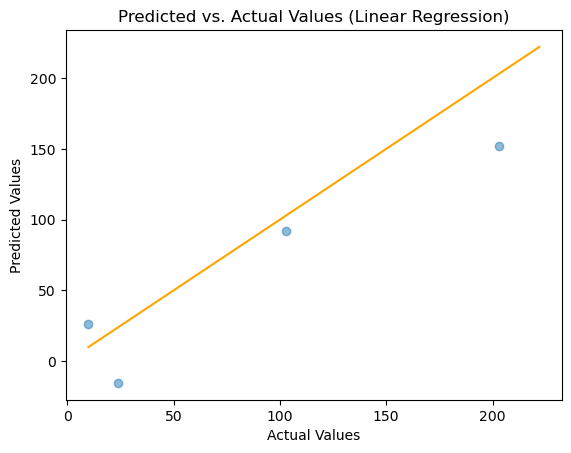

In [56]:
#plot the predicted vs actual values 
#predocted x-axis
#target values y-axis

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Linear Regression)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

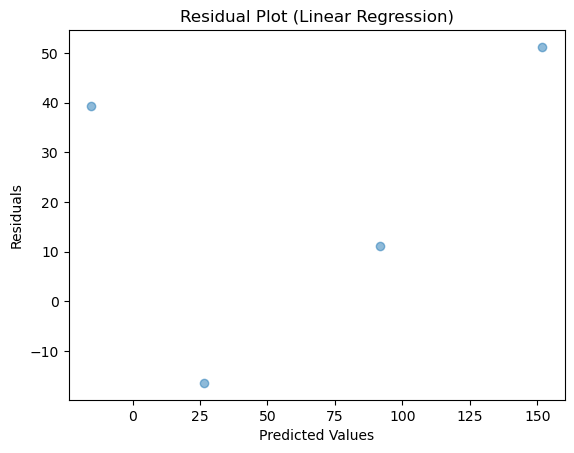

In [57]:
#plotting the residuals
#plotting residuals against the predicted values againts the predicted values of the target variable

plt.scatter(y_pred, y_test - y_pred, alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show

# PERFORMING TEXT ANALYSIS

In [58]:
#importing libraries and modules

import nltk
from nltk import sent_tokenize, word_tokenize

In [59]:
!pip install clean-text


In [60]:
import cleantext

In [61]:
text = data['Title'].astype(pd.StringDtype())
text

0                      Box Set For Business Cards
1       Label Design  Bottle Nutrition Supplement
2                             Juice Bottle Label 
3                                          Labels
4                                          Labels
                          ...                    
617                  Food Supplement Capsule Box 
618                               Cosmetic Label 
619                          Shampoo Label Design
620    Jam Label Design (Blueberry & Strawberry).
621                         Orange Juice   Design
Name: Title, Length: 592, dtype: string

In [62]:
text.count()

592

In [63]:
#combining all the words from the column together
text = ' '.join(text)
text

"Box Set For Business Cards Label Design  Bottle Nutrition Supplement Juice Bottle Label  Labels Labels Soap Wrap Labels Sauce Jar Label  - Western 3 Box Design  Label  4 Label Design  Royal Gift Package Box  V2 White Wine Label Vector  Label Design  Bottle Nutrition Supplement Supplement labels CD Sleeve Honey Jar Label  Product Display Box Beer Label Vector  E-Cigarette Liquid Flavor Box and Label Label Design  Bottle Nutrition Supplement Accessory Fetish Package  Package Design  Dry Fuits Bag  Champagne Label Vector  Juice Bottle Label  V3 Grand'Agio - Wine Label Vector  Red Wine Label Vector  Business Software Box CD Sleeve v2 Bus in a Box; Red Double Decker London Bus Label Design  Wine & Cider Bottle Box Design Sparkling Wine Label Vector  Speed Multipurpose Package  Supplement Label  Vol-06 NOTRO Multipurpose Box  Software Package  Cupcake Package Label Design  Wine Cider Vines Fortified Wine Supplement Label  Vol-05 Supplement Label  Fresh Perfume and Fragrance Package  Summer 

In [64]:
import cleantext
import nltk
from nltk.corpus import stopwords

In [65]:
import cleantext

text_clean = cleantext.clean(text, #clean_all= False ,
no_line_breaks=True,     
lower=True ,# Convert to lowercase
no_numbers=True ,# Remove all digits 
no_punct=True ,# Remove all punctuations
replace_with_number="",
replace_with_punct="",
                            )
                             
print(text_clean)

box set for business cards label design bottle nutrition supplement juice bottle label labels labels soap wrap labels sauce jar label western box design label label design royal gift package box v2 white wine label vector label design bottle nutrition supplement supplement labels cd sleeve honey jar label product display box beer label vector ecigarette liquid flavor box and label label design bottle nutrition supplement accessory fetish package package design dry fuits bag champagne label vector juice bottle label v3 grandagio wine label vector red wine label vector business software box cd sleeve v2 bus in a box red double decker london bus label design wine cider bottle box design sparkling wine label vector speed multipurpose package supplement label vol notro multipurpose box software package cupcake package label design wine cider vines fortified wine supplement label vol supplement label fresh perfume and fragrance package summer suntan or beauty product versions box label desig

In [66]:
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
words = [word for word in text_clean.split() if word not in sw]
words

['box',
 'set',
 'business',
 'cards',
 'label',
 'design',
 'bottle',
 'nutrition',
 'supplement',
 'juice',
 'bottle',
 'label',
 'labels',
 'labels',
 'soap',
 'wrap',
 'labels',
 'sauce',
 'jar',
 'label',
 'western',
 'box',
 'design',
 'label',
 'label',
 'design',
 'royal',
 'gift',
 'package',
 'box',
 'v2',
 'white',
 'wine',
 'label',
 'vector',
 'label',
 'design',
 'bottle',
 'nutrition',
 'supplement',
 'supplement',
 'labels',
 'cd',
 'sleeve',
 'honey',
 'jar',
 'label',
 'product',
 'display',
 'box',
 'beer',
 'label',
 'vector',
 'ecigarette',
 'liquid',
 'flavor',
 'box',
 'label',
 'label',
 'design',
 'bottle',
 'nutrition',
 'supplement',
 'accessory',
 'fetish',
 'package',
 'package',
 'design',
 'dry',
 'fuits',
 'bag',
 'champagne',
 'label',
 'vector',
 'juice',
 'bottle',
 'label',
 'v3',
 'grandagio',
 'wine',
 'label',
 'vector',
 'red',
 'wine',
 'label',
 'vector',
 'business',
 'software',
 'box',
 'cd',
 'sleeve',
 'v2',
 'bus',
 'box',
 'red',
 'doubl

In [68]:
len(words)

1727

In [69]:
#tokenizing the words --->> 

#convert list back into string 

words_text = ' '.join(words)

In [70]:
#explore the frequency of words in a collection of text. 
#analyze the occurance of words

!pip install wordcloud
from wordcloud import WordCloud
from datetime import timedelta 

<function matplotlib.pyplot.show(close=None, block=None)>

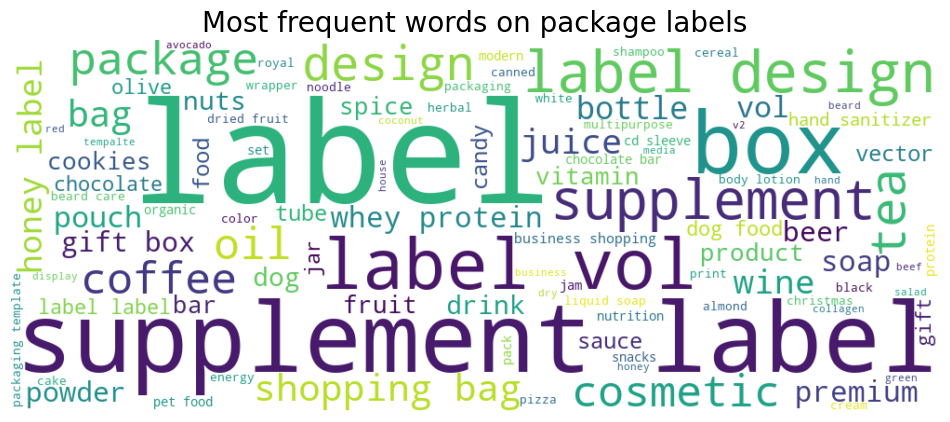

In [71]:
wordcloud = WordCloud(width=1000, height=400, max_words= 100, background_color = 'white').generate(words_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most frequent words on package labels", fontsize =20)
plt.axis('off')
plt.show

In [72]:
#counting the words 
 #used collections.counter

from collections import Counter
import re
!pip install -U prettytable
from prettytable import PrettyTable

In [73]:
#explore most frequently used words 

counted_words = Counter(words_text.split())
counted_words

#create a counted dataframe
counted_df= pd.DataFrame(counted_words.items(), columns = ['Word', 'Count']).sort_values('Count', ascending=False).reset_index(drop=True)

#generate a plot 
plt.figure(figsize =(12,4))
px.bar(counted_df, x ='Word', y='Count', title='Most frequently used words on the package labels')
# Comments
# Good idea
# I can only recommend to list all the words and not stop at the top 10
# just to see what the results look like
# when you present your results, it is good to show the top 10, like you do here

<Figure size 1200x400 with 0 Axes>

In [74]:
#explore TOP 20 most frequently used words 

counted_words = Counter(words_text.split())
counted_words

#create a counted dataframe
counted_df= pd.DataFrame(counted_words.items(), columns = ['Word', 'Count']).sort_values('Count', ascending=False).reset_index(drop=True)

#generate a plot 
plt.figure(figsize =(12,4))
px.bar(counted_df[:20], x ='Word', y='Count', title='Most frequently used words on the package labels')


<Figure size 1200x400 with 0 Axes>

In [75]:
counted_words

Counter({'box': 72,
         'set': 5,
         'business': 9,
         'cards': 1,
         'label': 264,
         'design': 58,
         'bottle': 14,
         'nutrition': 5,
         'supplement': 113,
         'juice': 17,
         'labels': 14,
         'soap': 15,
         'wrap': 2,
         'sauce': 7,
         'jar': 6,
         'western': 1,
         'royal': 4,
         'gift': 16,
         'package': 22,
         'v2': 3,
         'white': 4,
         'wine': 16,
         'vector': 7,
         'cd': 5,
         'sleeve': 5,
         'honey': 18,
         'product': 6,
         'display': 3,
         'beer': 10,
         'ecigarette': 1,
         'liquid': 6,
         'flavor': 1,
         'accessory': 1,
         'fetish': 1,
         'dry': 3,
         'fuits': 1,
         'bag': 38,
         'champagne': 1,
         'v3': 1,
         'grandagio': 1,
         'red': 3,
         'software': 2,
         'bus': 2,
         'double': 1,
         'decker': 1,
         'london'

In [76]:
#it was seen that label is the most used word, however, label is a generic word that will appear on all
#packaging labels to describe that it is a label.
#the next most used word is supplement so we'll look more into this word 

#select only labels with supplement in the title 

supplement = data1[data1['Title'].str.contains('Supplement')]
supplement


Image source  \
1    https://graphicriver.img.customer.envatouserco...   
12   https://graphicriver.img.customer.envatouserco...   
13   https://graphicriver.img.customer.envatouserco...   
19   https://graphicriver.img.customer.envatouserco...   
34   https://graphicriver.img.customer.envatouserco...   
..                                                 ...   
588  https://graphicriver.img.customer.envatouserco...   
589  https://graphicriver.img.customer.envatouserco...   
596  https://graphicriver.img.customer.envatouserco...   
599  https://graphicriver.img.customer.envatouserco...   
617  https://graphicriver.img.customer.envatouserco...   

                                         Title        Creator  Price  Sales  \
1    Label Design  Bottle Nutrition Supplement  designstudios    9.0    216   
12   Label Design  Bottle Nutrition Supplement  designstudios    9.0    113   
13                           Supplement labels   jumpingideas   25.0    104   
19   Label Design  Bottle Nutrition Supplement  designstudios    9.0     86   
34                    Supplement Label  Vol-06    Artsoldiers   18.0     65   
..                                         ...            ...    ...    ...   
588                   Supplement Label  Vol-30    graphicgrow   30.0      1   
589               Vitamin D Liquid Supplement     graphicgrow   30.0      1   
596      Calcium / Vitamin D Supplement  Label  Plexa_Designs   89.0      1   
599                       Pet Food Supplement     packgallery   17.0      1   
617               Food Supplement Capsule Box     Artsoldiers   21.0      1   

     Rate  Reviews       Date  \
1     NaN      NaN 2016-02-16   
12    NaN      NaN 2015-12-04   
13    5.0      3.0 2015-12-23   
19    NaN      NaN 2016-07-11   
34    NaN      NaN 2017-03-06   
..    ...      ...        ...   
588   NaN      NaN 2017-11-28   
589   NaN      NaN 2018-03-07   
596   NaN      NaN 2021-08-17   
599   NaN      NaN 2022-10-15   
617   NaN      NaN 2020-08-26   

                                                   Url  Year  Income  
1    https://graphicriver.net/item/label-design-tem...  2016  1944.0  
12   https://graphicriver.net/item/label-design-tem...  2015  1017.0  
13   https://graphicriver.net/item/supplement-label...  2015  2600.0  
19   https://graphicriver.net/item/label-design-tem...  2016   774.0  
34   https://graphicriver.net/item/supplement-label...  2017  1170.0  
..                                                 ...   ...     ...  
588  https://graphicriver.net/item/supplement-label...  2017    30.0  
589  https://graphicriver.net/item/vitamin-d-liquid...  2018    30.0  
596  https://graphicriver.net/item/calcium-vitamin-...  2021    89.0  
599  https://graphicriver.net/item/pet-food-supplem...  2022    17.0  
617  https://graphicriver.net/item/food-supplement-...  2020    21.0  

[114 rows x 11 columns]

In [77]:
supplement = supplement[['Creator', 'Price', 'Sales', 'Rate', 'Reviews', 'Year']]
supplement

grouped_supp = supplement.groupby(['Year'], sort = False, as_index=False).sum()
grouped_supp

C:\Users\marumom\AppData\Local\Temp\ipykernel_51516\3700562591.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Year   Price  Sales  Rate  Reviews
0  2016   389.0    644  4.67      3.0
1  2015    59.0    274  5.00      3.0
2  2017  1485.0    570  2.00      3.0
3  2019   493.0     58  0.00      0.0
4  2020   484.0    106  0.00      0.0
5  2018   734.0    114  0.00      0.0
6  2021   302.0      9  0.00      0.0
7  2022    17.0      1  0.00      0.0

In [78]:
#barplot

import plotly.express as px

fig_supp = px.bar(grouped_supp, x ='Year', y='Sales', color='Sales')
fig_supp

#we can see that the supplement design packages sold the most between 2016 and 2017

In [79]:
#analyzing the performance of other words and their sales
#words vs sales

#select only labels with box, design words in the titles

box = data1[data1['Title'].str.contains('Box')]
box


Image source  \
0    https://graphicriver.img.customer.envatouserco...   
7    https://graphicriver.img.customer.envatouserco...   
10   https://graphicriver.img.customer.envatouserco...   
16   https://graphicriver.img.customer.envatouserco...   
18   https://graphicriver.img.customer.envatouserco...   
..                                                 ...   
574  https://graphicriver.img.customer.envatouserco...   
580  https://graphicriver.img.customer.envatouserco...   
582  https://graphicriver.img.customer.envatouserco...   
614  https://graphicriver.img.customer.envatouserco...   
617  https://graphicriver.img.customer.envatouserco...   

                                       Title         Creator  Price  Sales  \
0                 Box Set For Business Cards          zarins    9.0    222   
7                              3 Box Design         mihalymm   13.0    138   
10                Royal Gift Package Box  V2        EladChai    7.0    117   
16                       Product Display Box    everytuesday    6.0    103   
18   E-Cigarette Liquid Flavor Box and Label          joiaco    7.0     95   
..                                       ...             ...    ...    ...   
574       Chocolate Box and Truffle Wrapper    Plexa_Designs   89.0      1   
580                                    Box           hthelal   29.0      1   
582                Cosmetics Box   - 5 sizes  ArtBeatDesigns   25.0      1   
614                      Lipstick Box Design    AmssCreation    9.0      1   
617             Food Supplement Capsule Box      Artsoldiers   21.0      1   

     Rate  Reviews       Date  \
0    4.50     10.0 2012-06-08   
7    3.67      3.0 2015-10-26   
10   3.33      3.0 2012-06-14   
16    NaN      NaN 2012-06-08   
18    NaN      NaN 2014-11-29   
..    ...      ...        ...   
574   NaN      NaN 2019-07-01   
580   NaN      NaN 2022-10-11   
582   NaN      NaN 2020-05-29   
614   NaN      NaN 2020-05-08   
617   NaN      NaN 2020-08-26   

                                                   Url  Year  Income  
0    https://graphicriver.net/item/box-set-for-busi...  2012  1998.0  
7    https://graphicriver.net/item/3-box-design-tem...  2015  1794.0  
10   https://graphicriver.net/item/royal-gift-packa...  2012   819.0  
16   https://graphicriver.net/item/product-display-...  2012   618.0  
18   https://graphicriver.net/item/ecigarette-liqui...  2014   665.0  
..                                                 ...   ...     ...  
574  https://graphicriver.net/item/chocolate-box-an...  2019    89.0  
580  https://graphicriver.net/item/box-packaging-te...  2022    29.0  
582  https://graphicriver.net/item/cosmetics-box-pa...  2020    25.0  
614  https://graphicriver.net/item/lipstick-box-des...  2020     9.0  
617  https://graphicriver.net/item/food-supplement-...  2020    21.0  

[70 rows x 11 columns]

In [80]:
box = box[['Creator', 'Price', 'Sales', 'Rate', 'Reviews', 'Year']]
box

grouped_box = box.groupby(['Year'], sort=False, as_index=False).sum()
grouped_box


C:\Users\marumom\AppData\Local\Temp\ipykernel_51516\1563850082.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Year  Price  Sales   Rate  Reviews
0   2012  152.0   1114  13.83     24.0
1   2015  148.0    477   3.67      3.0
2   2014   13.0    123   0.00      0.0
3   2013   41.0    108   0.00      0.0
4   2020  143.0     59   0.00      0.0
5   2016  136.0     78   0.00      0.0
6   2017  111.0     29   0.00      0.0
7   2018   76.0     17   0.00      0.0
8   2021   37.0      6   0.00      0.0
9   2019   89.0      1   0.00      0.0
10  2022   29.0      1   0.00      0.0

In [81]:
#create other dataframes for the popular words: Supplement, Box, Design, Volume, Bag, Tea, Package

In [82]:
#barplot

import plotly.express as px

fig_box = px.bar(grouped_box, x ='Year', y='Sales', color='Sales')
fig_box

#most labels with words 'box' were sold in 2012, then there is another surge in 2015, 
#following the surge, the sales drop with 0 sales recorded in 2022



In [83]:
#consider the effect of using certain words on sales
#plot a simple words vs sales scatter plot 
#is there a relationship between certain words and the sales? 

#"supplement" sales grouped by year

supplement_sales = supplement[['Sales', 'Year']]
supplement_sales

grouped_supp2 = supplement_sales.groupby(['Year'], sort=False, as_index=False).sum()
grouped_supp2

Year  Sales
0  2016    644
1  2015    274
2  2017    570
3  2019     58
4  2020    106
5  2018    114
6  2021      9
7  2022      1

In [84]:
#'box' sales grouped by year
box_sales = box[['Sales', 'Year']]
box_sales

grouped_box2 = box_sales.groupby(['Year'], sort=False, as_index=False).sum()
grouped_box2

Year  Sales
0   2012   1114
1   2015    477
2   2014    123
3   2013    108
4   2020     59
5   2016     78
6   2017     29
7   2018     17
8   2021      6
9   2019      1
10  2022      1

<Axes: xlabel='Year', ylabel='Sales'>

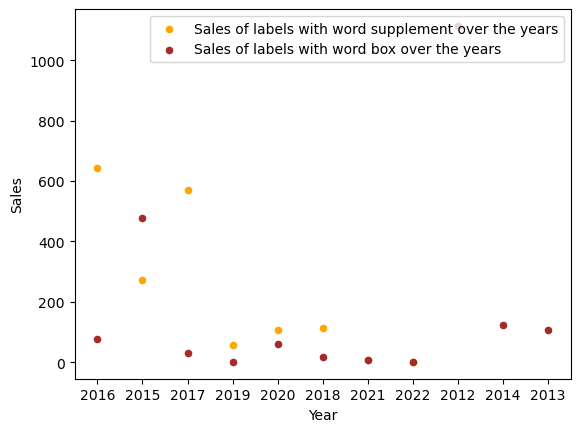

In [85]:
#try to scatter plot the above

ax = grouped_supp.plot(kind='scatter', x='Year', y='Sales', color='orange',
                       label= 'Sales of labels with word supplement over the years')
grouped_box.plot(kind='scatter', x='Year', y='Sales', color='brown',
                 label='Sales of labels with word box over the years', ax=ax)

In [86]:
#big data frame of the words of interest: Supplement, Box, Design, Volume, Bag, Tea, Package

words_df = data1[data1['Title'].str.contains('Supplement','Box')] #onlyallowing me to add 2 variables
words_df



Image source  \
1    https://graphicriver.img.customer.envatouserco...   
12   https://graphicriver.img.customer.envatouserco...   
13   https://graphicriver.img.customer.envatouserco...   
19   https://graphicriver.img.customer.envatouserco...   
34   https://graphicriver.img.customer.envatouserco...   
..                                                 ...   
588  https://graphicriver.img.customer.envatouserco...   
589  https://graphicriver.img.customer.envatouserco...   
596  https://graphicriver.img.customer.envatouserco...   
599  https://graphicriver.img.customer.envatouserco...   
617  https://graphicriver.img.customer.envatouserco...   

                                         Title        Creator  Price  Sales  \
1    Label Design  Bottle Nutrition Supplement  designstudios    9.0    216   
12   Label Design  Bottle Nutrition Supplement  designstudios    9.0    113   
13                           Supplement labels   jumpingideas   25.0    104   
19   Label Design  Bottle Nutrition Supplement  designstudios    9.0     86   
34                    Supplement Label  Vol-06    Artsoldiers   18.0     65   
..                                         ...            ...    ...    ...   
588                   Supplement Label  Vol-30    graphicgrow   30.0      1   
589               Vitamin D Liquid Supplement     graphicgrow   30.0      1   
596      Calcium / Vitamin D Supplement  Label  Plexa_Designs   89.0      1   
599                       Pet Food Supplement     packgallery   17.0      1   
617               Food Supplement Capsule Box     Artsoldiers   21.0      1   

     Rate  Reviews       Date  \
1     NaN      NaN 2016-02-16   
12    NaN      NaN 2015-12-04   
13    5.0      3.0 2015-12-23   
19    NaN      NaN 2016-07-11   
34    NaN      NaN 2017-03-06   
..    ...      ...        ...   
588   NaN      NaN 2017-11-28   
589   NaN      NaN 2018-03-07   
596   NaN      NaN 2021-08-17   
599   NaN      NaN 2022-10-15   
617   NaN      NaN 2020-08-26   

                                                   Url  Year  Income  
1    https://graphicriver.net/item/label-design-tem...  2016  1944.0  
12   https://graphicriver.net/item/label-design-tem...  2015  1017.0  
13   https://graphicriver.net/item/supplement-label...  2015  2600.0  
19   https://graphicriver.net/item/label-design-tem...  2016   774.0  
34   https://graphicriver.net/item/supplement-label...  2017  1170.0  
..                                                 ...   ...     ...  
588  https://graphicriver.net/item/supplement-label...  2017    30.0  
589  https://graphicriver.net/item/vitamin-d-liquid...  2018    30.0  
596  https://graphicriver.net/item/calcium-vitamin-...  2021    89.0  
599  https://graphicriver.net/item/pet-food-supplem...  2022    17.0  
617  https://graphicriver.net/item/food-supplement-...  2020    21.0  

[114 rows x 11 columns]

**Performing TF-IDF**

-This captures the relative importance of words in each title
-However it does not capture the relationships between words because each token is treated as a unique unit
-It's important to note that just because a word is moderately frequent in titles it won't always mean that it is unique it might be a common descriptor of the packaging

In [87]:
#TF-IDF to create feature vector to retrieve info. Trying to quantify the importance of certain words.
#how often a token appears in one document versus how often it appears in other documents 
!pip install -U spacy==3
!python -m spacy download en_core_web_sm
!python -m spacy info

import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

  Using cached spacy-3.0.0.tar.gz (7.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [502 lines of output]
    Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/55/3a/5121b58b578a598b269537e09a316ad2a94fdd561a2c6eb75cd68578cc6b/setuptools-69.0.3-py3-none-any.whl.metadata
    Using cached setuptools-69.0.3-py3-none-any.whl.metadata (6.3 kB)
    Obtaining dependency information for cython>=0.25 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
    Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
    Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
    Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl.met

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.7/12.8 MB 15.7 MB/s eta 0:00:01
     ---- ----------------------------------- 1.4/12.8 MB 14.6 MB/s eta 0:00:01
     ----- ---------------------------------- 1.6/12.8 MB 13.1 MB/s eta 0:00:01
     ------ --------------------------------- 2.0/12.8 MB 11.8 MB/s eta 0:00:01
     ------- -------------------------------- 2.5/12.8 MB 10.5 MB/s eta 0:00:01
     -------- ------------------------------- 2.9/12.8 MB 10.2 MB/s eta 0:00:01
     --------- ------------------------------ 3.2/12.8 MB 9.6 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.8 MB 9.2 MB/s eta 0:00:02
     ----------- ---------------------------- 3.8/12.8 MB 9.0 MB/s eta 0:00:01
     ------------ --------------------------- 4.1/12.8 MB 8.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 8.4 MB/s eta 0:00:02
     -------------- ------------------------- 4.5/12.

In [88]:
title_data = data['Title'].astype('string')
title_data

0                      Box Set For Business Cards
1       Label Design  Bottle Nutrition Supplement
2                             Juice Bottle Label 
3                                          Labels
4                                          Labels
                          ...                    
617                  Food Supplement Capsule Box 
618                               Cosmetic Label 
619                          Shampoo Label Design
620    Jam Label Design (Blueberry & Strawberry).
621                         Orange Juice   Design
Name: Title, Length: 592, dtype: string

In [89]:
title_data.dtypes

string[python]

In [90]:
#I want ot use spacy's tokenizer so I'll create a callback
nlp =spacy.load('en_core_web_sm')

#here I'll remove punctuation and spaces
#filter for tokens consisting of aphabetic characters 

def spacy_tokenizer(doc):
    #with nlp():
        return [t.lemma_ for t in nlp(doc) if
               not t.is_punct and
               not t.is_space and
               t.is_alpha]


In [91]:
#i'll be using the default settings of tfidvectorizer

tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer)
features = tfidf.fit_transform(title_data)

C:\Users\marumom\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [92]:
#the number of unique tokens

print(len(tfidf.get_feature_names_out()))

405


In [93]:
#the dimensions of our feature matrix. x rows (documents) by Y features (tokens) 
#the tfidf scores are:
print(features[0])

  (0, 59)	0.5732707247589232
  (0, 48)	0.4353990677907031
  (0, 151)	0.42723437108880447
  (0, 313)	0.4791586776683692
  (0, 42)	0.2639433304268536


In [94]:
feature_array = features.toarray()
feature_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
#transform query into a tfidf vector

query = ['supplement']
query_tfidf = tfidf.transform(query)

In [96]:
#now we're calculating the cosine sumilarities between the query and each document 
#calling flatten here because cosine_similarity returns a list
#of lists and im looking for a single list
cosine_similarities = cosine_similarity(features, query_tfidf).flatten()
cosine_similarities

array([0.        , 0.30679035, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.30679035, 0.83190454, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30679035,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.83190454,
       0.        , 0.        , 0.        , 0.        , 0.83190454,
       0.83190454, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.83190454, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.83190454, 0.        , 0.        , 0.     

In [97]:
#find the top k most similar titles
def top_k(arr, k):
    kth_largest = (k+1)*-1
    return np.argsort(arr)[:kth_largest:-1]

In [98]:
#for the supplement query these are the top 5 titles 
top_related_indices = top_k(cosine_similarities, 5)
top_related_indices

array([166, 449, 417, 426, 361], dtype=int64)

In [99]:
#explore the respective cosine similarities
cosine_similarities[top_related_indices]

array([1.        , 1.        , 1.        , 0.83190454, 0.83190454])

In [100]:
#what does the top 5 match or title look like 
title_data[top_related_indices[:6]]

166            Supplement Label  006
449              MultiVitamin Label 
417    Premium wafer cubes packaging
426            Dog Food Supplement  
361              Honey Label for Jar
Name: Title, dtype: string

In [101]:
#create a 'box' query
query = ['box']
query_tfidf = tfidf.transform(query)

cosine_similarities = cosine_similarity(features, query_tfidf).flatten()
top_related_indices = top_k(cosine_similarities, 5)

print(top_related_indices)
print(cosine_similarities[top_related_indices])
print(title_data[top_related_indices[:5]])

[ 43 550  91 193 127]
[1.         1.         0.68346374 0.68346374 0.68346374]
43                           Box 
550    Chips/Snacks  [Tube / Can]
91                    Box  Design
193                Package Print 
127                   Box  Design
Name: Title, dtype: string


********************************#Question
What are the chances that your sales are going to increase when using a certain word in a label?


***Topic Modelling using Gensim***

In [102]:
!pip install -U gensim==4.*

In [103]:
from gensim import models, corpora
from gensim import similarities 
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

In [104]:
#use the title_data 


----++----

NOTES

Is there a relationship between certain words and the sales?

1. There is the code to group the sales for a word (box and supplement) by year. I just need to put this code in a function to do this for all words. Then plot the scatter/bar plot
2. Look into TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings for working with text.
3. Look into Association mining. To find patterns in data

----++----